In [15]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

    желаемая точность Δ = 3;
    дисперсия 𝜎2 = 225;
    уровень доверия 𝛽 = 0.95.

Ответ округлите до целого

Уровень доверия равен β = 0.95, поэтому α = 0.05
По таблице нормального распределения находим 1 − α /2 = 0.975 и определяем квантиль z_α = 2.241.


In [62]:
sigma = 15  # Стандартное отклонение
Z = 2.241  #  %   # Квантиль нормального распределения. 
Delta = 3 #%         #Погрешность

In [63]:
N = int(((sigma*Z)/Delta)**2)
print(f'Объём необходимой выборки составляет {N}')

Объём необходимой выборки составляет 125


Задание № 1

Постройте 98% доверительный интервал для среднего значения, если известно, что

    объем выборки n = 25;
    среднее значение по выборке 𝑥 = 130;
Из достоверных источников известно стандартное отклонение 𝜎 = 15

    .

В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

Доверительный интервал имеет вид ( ̄x − ∆;  ̄x + ∆). Уровень доверия равен β = 0.98, поэтому α = 0.02. По таблице нормального распределения находим 1 − α /2 = 0.99 и определяем квантиль z_α = 2.576. Теперь можем найти точность ∆ = (σ /√n)* z_α = (15/√25)*2.576 ≈ 7.728. Искомый 98%-доверительный интервал имеет вид (130 − 7.728; 130 + 7.728) = (122.272; 137.728)

In [5]:
Z = 2.576   # Квантиль нормального распределения.
n = 25      # объем выборки
sigma = 15  # Стандартное отклонение
x = 130     #среднее значение по выборке

In [4]:
delta = (sigma/n**0.5)*Z
delta

7.728

In [60]:
L = int((x + delta) - (x - delta))
print(f'Длина доверительного интервала составляет {L}')

Длина доверительного интервала составляет 15


Задание № 2

Даны две выборки роста мужчин и женщин.

    Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен 
    𝛼 = 0.001.
Покажите различия визуально

In [50]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...

In [51]:
t, p = stats.ttest_ind(population_men, population_women)
t, p

(1.9965185751426853, 0.04587753051134086)

In [52]:
stats.ttest_ind(population_men, population_women, equal_var = False)

Ttest_indResult(statistic=2.073546911730484, pvalue=0.038142644821268584)

pvalue больше 𝛼. Нулевая гипотеза подтверждена. Различие между выборками незначительно

In [53]:
from scipy import stats

In [54]:
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 1.9965185751426853
p = 0.04587753051134086


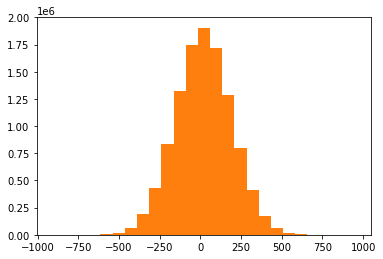

In [71]:
plt.hist(population_women, bins=25); #Выборка a
plt.hist(population_men, bins=25);  #Выборка b

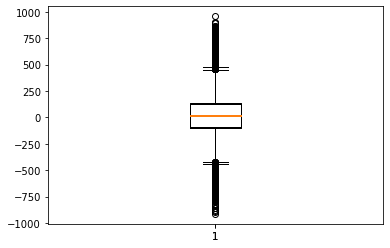

In [70]:
plt.boxplot(population_women);
plt.boxplot(population_men);

визуальных различий нет

 Задание № 3

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

    стандартное отклонение 𝜎 = 150;
    уровень доверия 𝛽 = 95%;
    Погрешность Δ = 50 рублей.

In [ ]:
Уровень доверия равен β = 0.95, поэтому α = 0.05
По таблице нормального распределения находим 1 − α /2 = 0.975 и определяем квантиль z_α = 2.241.


In [28]:
sigma = 150  # Стандартное отклонение
Z = 2.241  #  %   # Квантиль нормального распределения. 
Delta = 50 #%         #Погрешность

In [57]:
N = int(((sigma*Z)/Delta)**2)
print(f'Объём необходимой выборки составляет {N}')

Объём необходимой выборки составляет 45


 Задание № 4

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 (𝛼=0.05).

In [30]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [31]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

### Ваш код...

In [32]:
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [ ]:
pvalue больше 0.05 значит оснований отвергнуть нулевую гипотезу нет. Маг не умеет предсказывать погоду

Задание № 5

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 𝛽=90%
для выборки:

In [33]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

In [68]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [69]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


 Задание № 6

Принадлежат ли выборки data_1 и data_2 одному множеству?

    Оцените это с помощью известных вам тестов для проверок статистических гипотез;
    Покажите различия визуально.



In [39]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

In [40]:
t , p  = stats.ttest_ind(data_1, data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


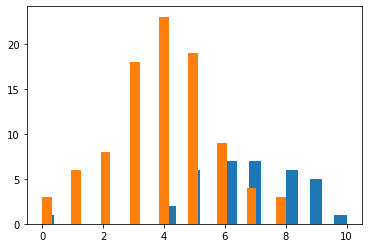

In [42]:
plt.hist(data_1, bins=25); #Выборка a
plt.hist(data_2, bins=25);  #Выборка b

Выборки принадлежат разным множествам, т.к. значение p очень низкое

 Задание № 7 (задание без подвоха)

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

    Предположим, Вы сформировали две гипотезы:
        нулевая гипотеза - распределение нормальное;
        альтернативная гипотеза - распределение ненормальное.
    допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)



Т.к. p-value меньше 5 %, то нулевая гипотеза отвергается. И если альтернативная гипотеза показала ненормальное распределение, то будем считать что у нас ненормальное распределение

 Задание № 8

Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

    Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

    При каком минимальном p-value различия были бы уже значимы?

    Если выборки незначительно отличаются, то продемонстрируйте это визуально



In [43]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

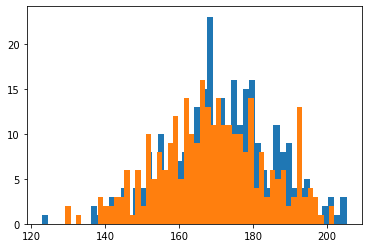

In [48]:
plt.hist(B, bins=50);
plt.hist(A, bins=50);

In [49]:
stats.ttest_rel(a=A, b=B)

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)

 Итак, мы видим, что у нас есть только 4% шансов найти такие различия между образцами случайно. Это меньше, чем уровень достоверности 5%. Нулевая гипотеза отвергается.
 При p-value = 0.05 различия были бы уже значимы
